<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


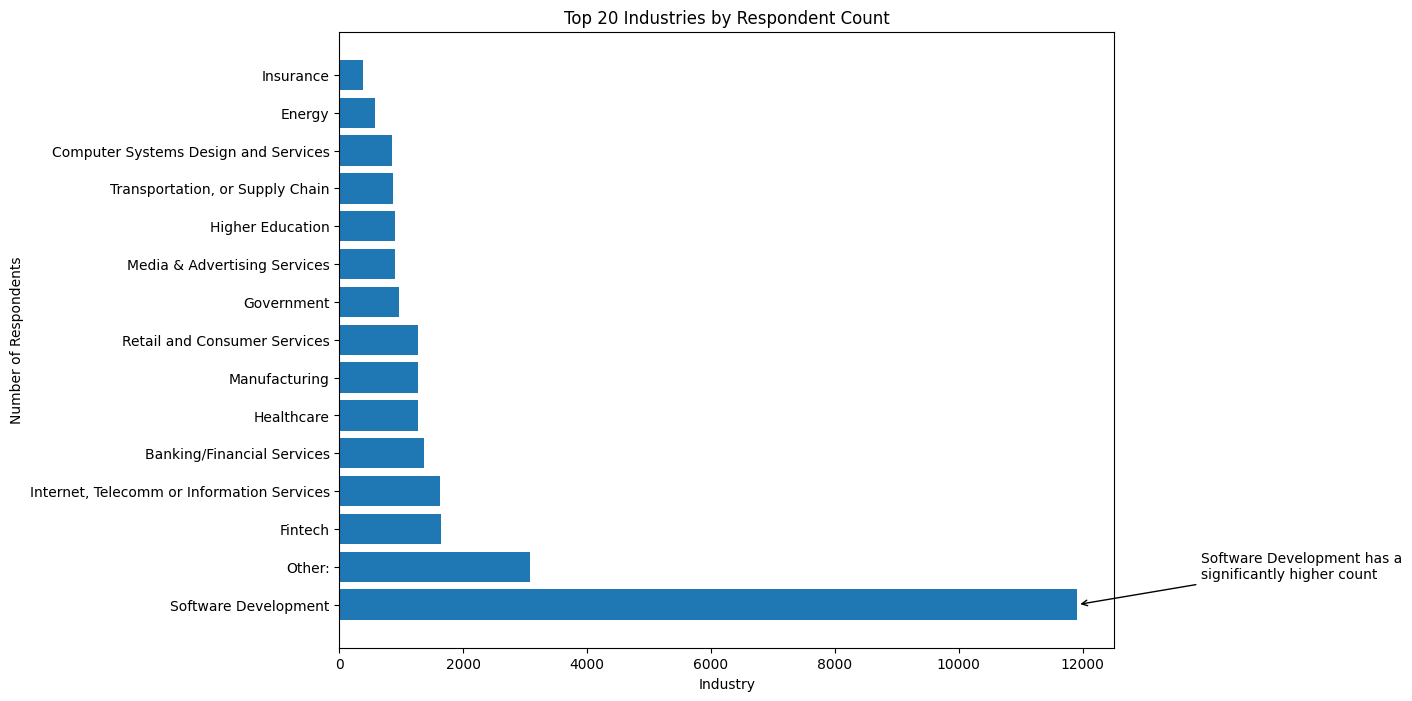

In [3]:
industry_counts = (
    df['Industry']
    .value_counts()
    .head(20)
)

# bar chart of industry value counts
industry_counts = df['Industry'].value_counts(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(industry_counts.index, industry_counts.values)

plt.annotate(
    'Software Development has a\nsignificantly higher count',
    xy=(industry_counts.values[0], 0),
    xytext=(industry_counts.values[0] + 2000, 1),
    arrowprops=dict(arrowstyle='->'),
    fontsize=10,
    va='center'
)
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.title('Top 20 Industries by Respondent Count')
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
df_comp = df[['ConvertedCompYearly']]

# ensure data is numeric
df_comp.loc[:, 'ConvertedCompYearly'] = pd.to_numeric(
    df_comp['ConvertedCompYearly'],
    errors='coerce'
)

df_comp = df_comp.dropna() # remove nulls

mean_comp = df_comp['ConvertedCompYearly'].mean() # calculate mean
median_comp = df_comp['ConvertedCompYearly'].median() # calculate median
std_comp = df_comp['ConvertedCompYearly'].std() # calculate standard deviation

comp_threshold = mean_comp + (3 * std_comp) # calculate threshold as 3 standard deviations above the mean
print('Compensation threshold is:', comp_threshold)

# identify values above the threshold
high_comp = df_comp[
    df_comp['ConvertedCompYearly'] > comp_threshold
]

print('Number of people receiving compensation above the threshold:', high_comp.count())

high_comp.sort_values(
    by='ConvertedCompYearly',
    ascending=False
).head(10)

Compensation threshold is: 646426.206521534
Number of people receiving compensation above the threshold: ConvertedCompYearly    89
dtype: int64


,ConvertedCompYearly
15837,16256603.0
12723,13818022.0
28379,9000000.0
17593,6340564.0
17672,4936778.0
19267,3367716.0
23694,2584118.0
33720,2237846.0
34523,2153432.0
13763,2048046.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


32712.0 107971.5 75259.5
Outliers using the interquartile range: ConvertedCompYearly    978
dtype: int64


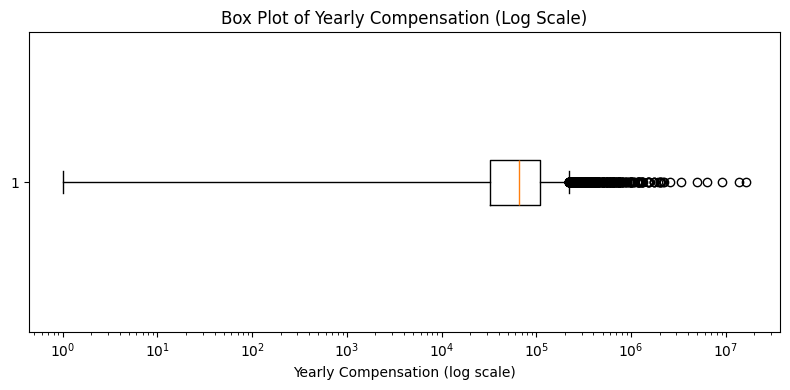

In [5]:
Q1 = df_comp['ConvertedCompYearly'].quantile(0.25) # bottom of interquartile range
Q3 = df_comp['ConvertedCompYearly'].quantile(0.75) # top of interquartile range

comp_iqr = Q3 - Q1

print(Q1, Q3, comp_iqr)

# calculate lower and upper bounds
lower_bound = Q1 - 1.5 * comp_iqr
upper_bound = Q3 + 1.5 * comp_iqr

# identify outliers
comp_outliers = df_comp[
    (df_comp['ConvertedCompYearly'] < lower_bound) |
    (df_comp['ConvertedCompYearly'] > upper_bound)
]

print('Outliers using the interquartile range:',comp_outliers.count()) # count outliers

# create boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(
    df_comp['ConvertedCompYearly'],
    vert=False,
    showfliers=True
)
plt.xscale('log')  # 🔑 key line
plt.xlabel('Yearly Compensation (log scale)')
plt.title('Box Plot of Yearly Compensation (Log Scale)')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['ConvertedCompYearly']) # drop nulls from ConvertedCompYearly

Q1 = df_copy['ConvertedCompYearly'].quantile(0.25) # bottom of interquartile range
Q3 = df_copy['ConvertedCompYearly'].quantile(0.75) # top of interquartile range
iqr = Q3 - Q1 # calculate interquartile range
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

df_no_outliers = df_copy[
    (df_copy['ConvertedCompYearly'] >= lower_bound) &
    (df_copy['ConvertedCompYearly'] <= upper_bound)
]

print("Original dataset size:", df.shape)
print("Dataset size without outliers:", df_no_outliers.shape)
print("Outliers removed:", df.shape[0] - df_no_outliers.shape[0])

Original dataset size: (65437, 114)
Dataset size without outliers: (22457, 114)
Outliers removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


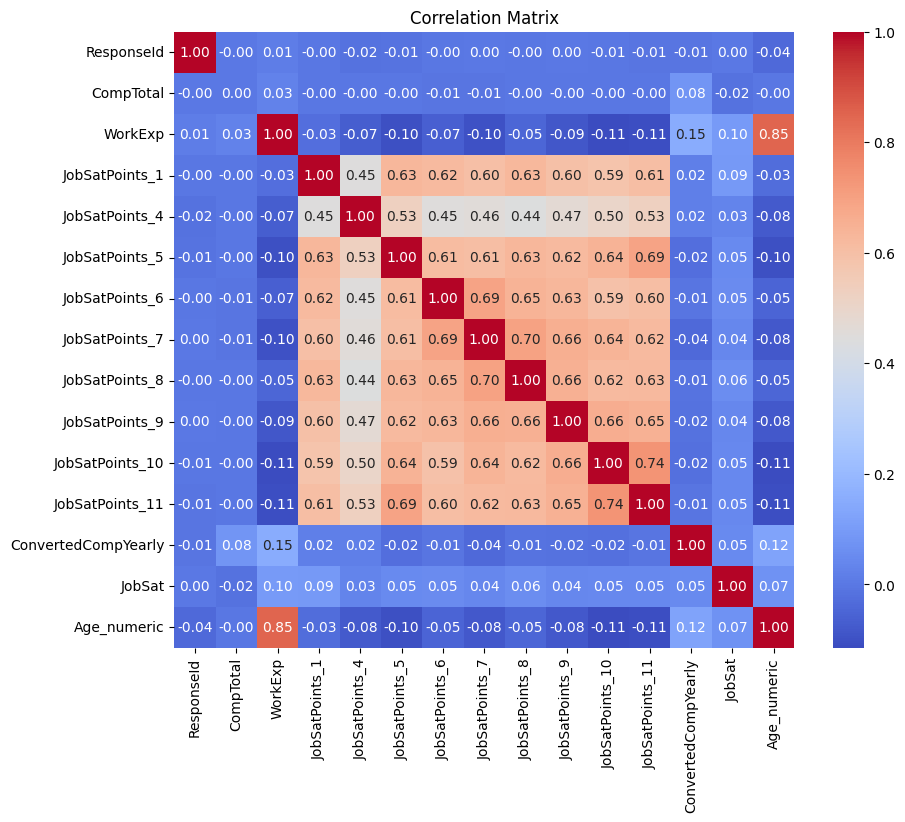

In [7]:
df['Age'].value_counts() # check existing values for age

df_age = df[df['Age'] != 'Prefer not to say'] # exclude unknown ages

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping) # add numeric age column

numeric_columns = df.select_dtypes(include=['number']).columns # select numeric columns

matrix = df[numeric_columns].corr()

# create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
